In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import fitsio
import glob

import numpy as np
import healpy as hp
import astropy.io.fits as pyfits
import xlens
import astropy.table as astTable
from matplotlib.ticker import MaxNLocator

(0.562552561435959, 3.9092628983110487, 5)
(0.14317535780051155, 8.246269118313036, 5)
(0.35387248221161705, 5.537305998916429, 5)
(0.21639123800938348, 7.057605646916436, 5)
(0.2612769470096645, 6.491600978911534, 5)
(0.032785604489709616, 12.1502813629834, 5)
(0.2252493608153481, 6.938567531030278, 5)
(0.2831158246853954, 6.24487129715592, 5)


/gpfs02/work/xiangchong.li/work/tmp/ipykernel_29061/2159502599.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


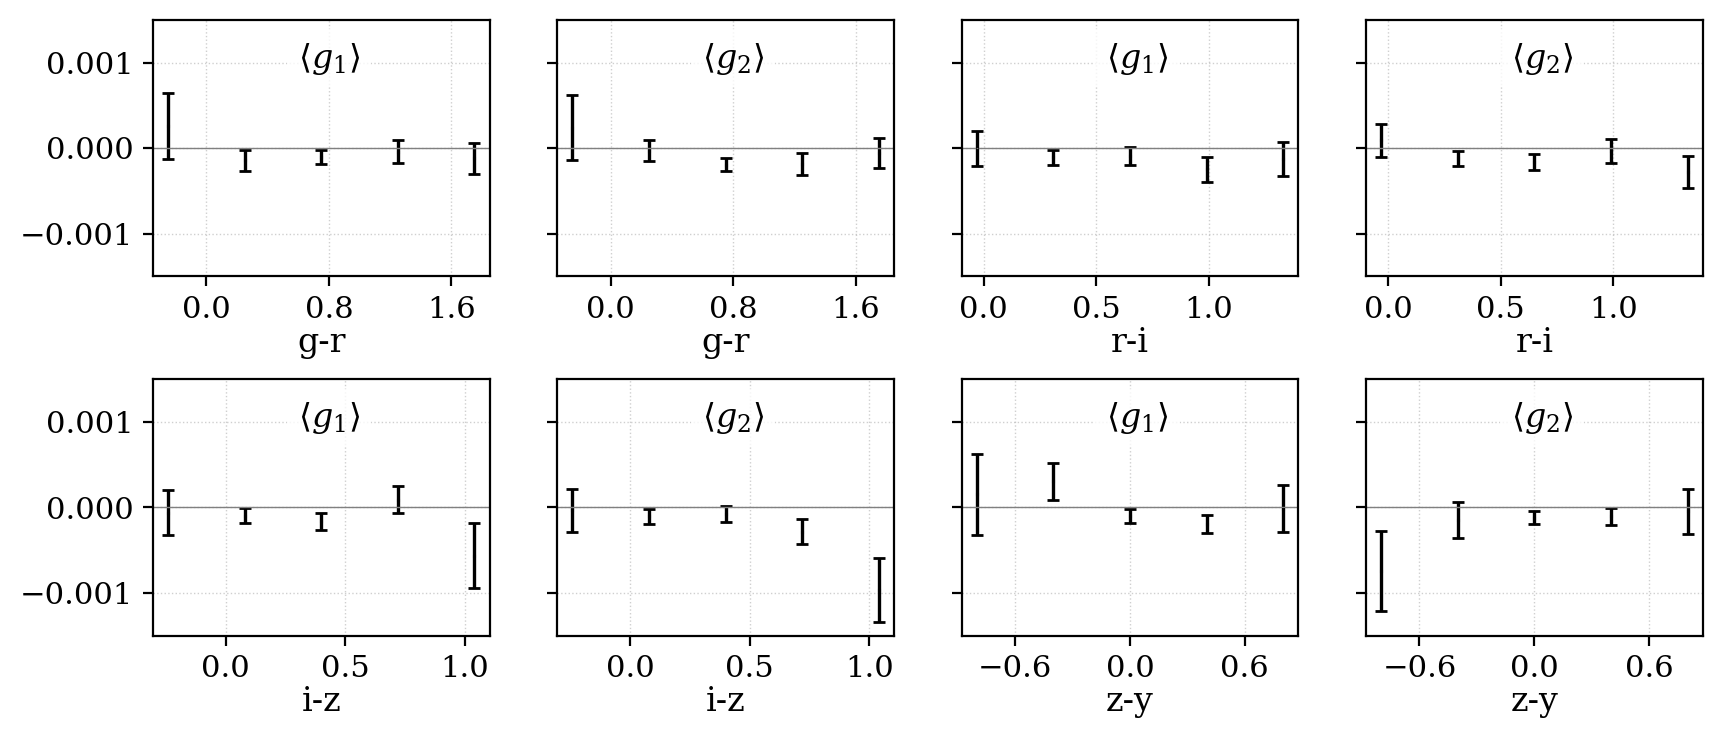

In [2]:
def pvalue_chi2(y, yerr):
    from scipy import stats
    chi2 = np.sum(((y) / yerr) ** 2)
    df = len(y)
    p = stats.chi2.sf(chi2, df)
    return p, chi2, df
    
# Create x, y, yerr for all 8 plots
x_data = []
y_data = []
y_errs = []

def compute_xy(data_subset):
    arr = np.average(data_subset, axis=0)
    x  = arr[0]
    y1 = arr[1] / arr[2]
    y2 = arr[3] / arr[4]
    return x, y1, y2

for ff in ["gr", "ri", "iz", "zy"]:
    data = fitsio.read(f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal_v2/tests/{ff}_stack.fits")
    # get the “nominal” values
    x, y1, y2 = compute_xy(data)
    
    # ---- bootstrap parameters ----
    nboot = 10000                     # number of bootstrap samples
    nreal = data.shape[0]             # how many realizations you have
    
    # pre-allocate arrays to hold each trial
    y1_boot = np.empty((nboot, y1.size))
    y2_boot = np.empty((nboot, y2.size))
    
    # ---- run the bootstrap ----
    for i in range(nboot):
        # sample `nreal` indices with replacement
        idx = np.random.choice(nreal, size=nreal, replace=True)
        # compute ratios on that resampled set
        _, y1_i, y2_i = compute_xy(data[idx])
        y1_boot[i] = y1_i
        y2_boot[i] = y2_i
    
    # ---- compute the 1-σ errors ----
    y1_err = np.std(y1_boot, axis=0)
    y2_err = np.std(y2_boot, axis=0)

    x_data.extend([x, x])
    y_data.extend([y1, y2])
    y_errs.extend([y1_err, y2_err])
    
# Titles and labels
titles = [r'$\langle g_1 \rangle$', r'$\langle g_2 \rangle$'] * 4
xlabels = ["g-r", "g-r", "r-i","r-i", "i-z","i-z", "z-y", "z-y"]

# Plotting
fig, axes = plt.subplots(2, 4, figsize=(10, 4), sharey=True, gridspec_kw={'hspace': 0.4})
axes = axes.flatten()

for i, ax in enumerate(axes):
    x = x_data[i]
    y = y_data[i]
    yerr = y_errs[i]

    ax.errorbar(x, y, yerr=yerr, fmt='s', color='black', markersize=0.1, capsize=2, linewidth=1.2)
    print(pvalue_chi2(y, yerr))
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.grid(True, linestyle=':', linewidth=0.5)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.text(0.43, 0.92, titles[i], transform=ax.transAxes,
            fontsize=12, va='top', ha='left',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
    ax.set_xlabel(xlabels[i], fontsize=12, labelpad=1)
    ax.set_ylim(-0.0015, 0.0015)
    ax.tick_params(labelsize=11)

plt.tight_layout()
plt.show()

(0.3126622618487318, 5.934321710936689, 5)
(1.8502522478615745e-05, 29.49925470841942, 5)
(1.7369467823036405e-06, 34.68745089415563, 5)
(0.006772012054720366, 16.02537049960504, 5)
(0.1063180545322018, 9.069651051824836, 5)
(0.5608045128394409, 3.9212803530880747, 5)
(0.019595139863037795, 13.438911424917896, 5)
(0.12400177474675965, 8.64695924558276, 5)


/gpfs02/work/xiangchong.li/work/tmp/ipykernel_29061/2662063885.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


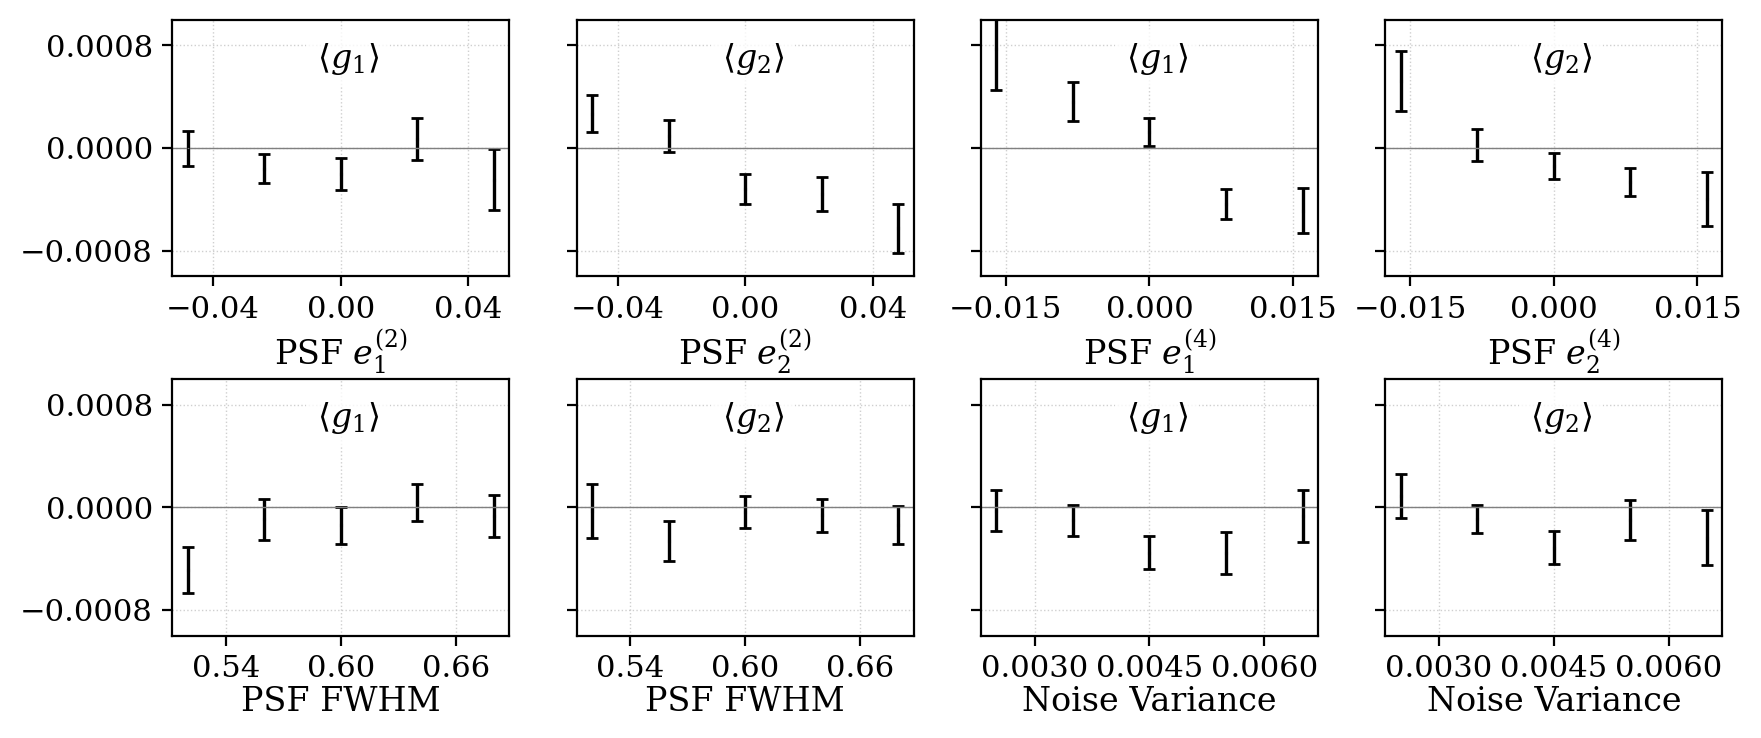

In [3]:
# Create x, y, yerr for all 8 plots
x_data = []
y_data = []
y_errs = []

def compute_xy(data_subset):
    arr = np.average(data_subset, axis=0)
    x  = arr[0]
    y1 = arr[1] / arr[2]
    y2 = arr[3] / arr[4]
    return x, y1, y2

for ff in ["psf2", "psf4", "size", "var"]:
    data = fitsio.read(f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal_v2/tests/{ff}_stack.fits")
    # get the “nominal” values
    x, y1, y2 = compute_xy(data)
    
    # ---- bootstrap parameters ----
    nboot = 1000                      # number of bootstrap samples
    nreal = data.shape[0]             # how many realizations you have
    
    # pre-allocate arrays to hold each trial
    y1_boot = np.empty((nboot, y1.size))
    y2_boot = np.empty((nboot, y2.size))
    
    # ---- run the bootstrap ----
    for i in range(nboot):
        # sample `nreal` indices with replacement
        idx = np.random.choice(nreal, size=nreal, replace=True)
        # compute ratios on that resampled set
        _, y1_i, y2_i = compute_xy(data[idx])
        y1_boot[i] = y1_i
        y2_boot[i] = y2_i
    
    # ---- compute the 1-σ errors ----
    y1_err = np.std(y1_boot, axis=0)
    y2_err = np.std(y2_boot, axis=0)

    x_data.extend([x, x])
    y_data.extend([y1, y2])
    y_errs.extend([y1_err, y2_err])
    
# Titles and labels
titles = [r'$\langle g_1 \rangle$', r'$\langle g_2 \rangle$'] * 4
xlabels = [
    r'PSF $e_1^{(2)}$', r'PSF $e_2^{(2)}$',
    r'PSF $e_1^{(4)}$', r'PSF $e_2^{(4)}$',
    'PSF FWHM', 'PSF FWHM',
    'Noise Variance', 'Noise Variance'
]

# Plotting
fig, axes = plt.subplots(2, 4, figsize=(10, 4), sharey=True, gridspec_kw={'hspace': 0.4})
axes = axes.flatten()

for i, ax in enumerate(axes):
    x = x_data[i]
    y = y_data[i]
    yerr = y_errs[i]

    ax.errorbar(x, y, yerr=yerr, fmt='s', color='black', markersize=0.1, capsize=2, linewidth=1.2)
    print(pvalue_chi2(y, yerr))
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.grid(True, linestyle=':', linewidth=0.5)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.text(0.43, 0.92, titles[i], transform=ax.transAxes,
            fontsize=12, va='top', ha='left',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
    ax.set_xlabel(xlabels[i], fontsize=12, labelpad=1)
    ax.set_ylim(-0.001, 0.001)
    ax.tick_params(labelsize=11)

plt.tight_layout()
plt.show()